# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [167]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi ** (D/2)/ sp.gamma(1+D/2)*R**(D)
    
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

0.0
0.0
-8.881784197001252e-16
0.0


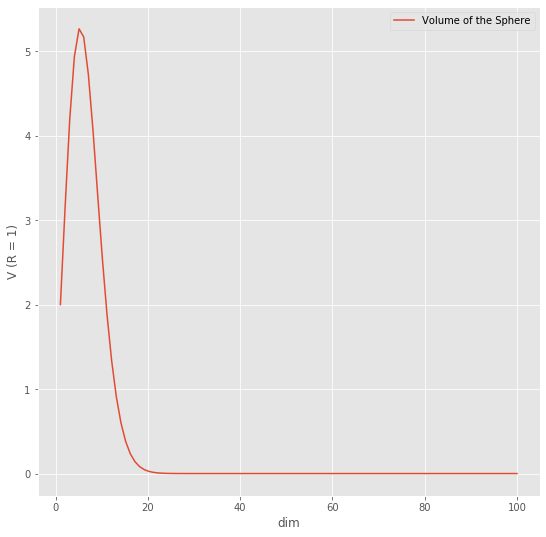

In [168]:
r0 = [2, np.pi, 4/3 * np.pi, (np.pi) ** 2 / 2]
    
    
for i in range(1, 5):
    
    print( r0[i - 1] - getSphereVolumeExact(i) )
    

    V_ = np.array([])
    
    for j in range(1, 100): 
        V_ = np.append( V_, getSphereVolumeExact(j) )

x_ = np.linspace(1, 100, 99)

plt.figure( figsize=(9, 9) )

plt.plot(x_, V_, label='Volume of the Sphere')
plt.xlabel('dim')
plt.ylabel('V (R = 1)')
plt.legend()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [175]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    
    dots = np.random.uniform( - R, R, (N, D) ) 
    r = []
    
    for i in range(N):
        
        if np.linalg.norm(dots[i,:]) <= 1:
            r = np.append(r, 1)
            
        r = np.sum(r)
        
    V = 2**D * r / N
    
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

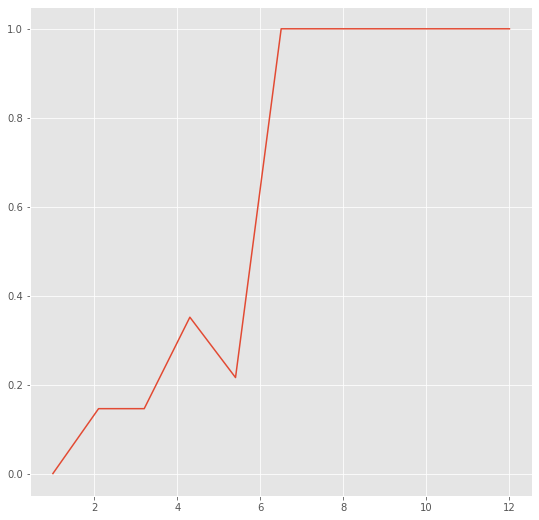

In [179]:
%matplotlib inline
plt.figure( figsize=(9, 9) )

N = 10

def eps(N, D):
    
    eps = np.abs( (getSphereVolumeExact(D) - getSphereVolumePseudorandom(N, D) ) / getSphereVolumeExact(D))
    
    return eps

epss = np.zeros(11)
xn = np.linspace (1, 12, 11)

for i in range (1, 12):
    epss[i - 1] = eps(N, i)

    
plt.plot(xn, epss)

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [146]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [147]:
#sobol_seq.i4_sobol_generate?

In [180]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    dots = sobol_seq.i4_sobol_generate(D,N)
    r = []
    
    for i in range(N):
        
        if np.linalg.norm(dots[i,:]) <= 1:
            r = np.append(r, 1)
            
        r = np.sum(r)
        
    V = 2**D * r / N
    
    
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

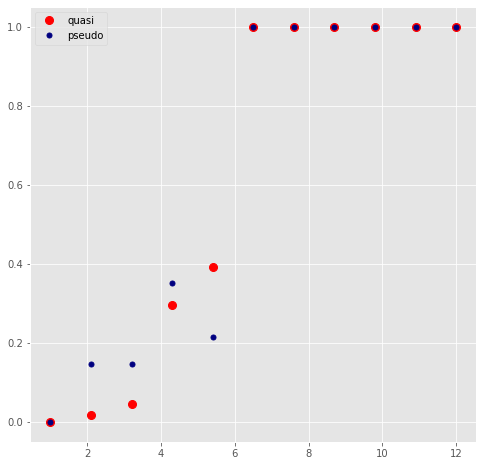

In [181]:
def epsn(N, D):
    
    eps = np.abs( (getSphereVolumeExact(D) - getSphereVolumeQuasirandom(N, D) ) / getSphereVolumeExact(D))
    
    return eps


plt.figure( figsize = (8,8))


epsss = np.zeros(11)
xn = np.linspace (1, 12, 11)

for i in range (1, 12):
    epsss[i - 1] = epsn(N, i)
    

plt.plot(xn, epsss, 'o', label = 'quasi', markersize = '8', color = 'r')
plt.plot(xn, epss, 'o', label = 'pseudo', markersize = '5', color = 'navy')
plt.legend(loc = 'best')

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 


Видим, что точность квази случая лучше во всех размерностях, около 7 точек на порядок меньше, чем для псевдослучайных
Хорошо брать много (достаточно) точек и Соболя
!!Обе последовательности применимы только при достаточно малых d

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [116]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
     
    return (-1) ** np.around(np.random.rand( N, N ))

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [182]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0]
        
    dE = 2 * state[i,j] * (state[ (i+1) % N, j] + state[i, (j+1) % N] + state[i-1, j] + state[i, j-1])
    
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [186]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    
    N = np.shape(state)[0]
    
    for _ in range(N * N):
        
        i, j = np.random.randint(N, size = 2)
        dE = getDeltaE( i, j, state )
        
        if dE > 0:      
            
            state[i, j] *= np.random.choice([-1, 1], p = [ np.exp(- dE / T), 1 - np.exp(-dE / T)])
        
        else:
            
            state[i, j] = - state[i, j]
            
            
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [197]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0
    N = np.shape(state)[0]
    
    for i in range(N):
        for j in range(N):
            
            E -= getDeltaE(i, j, state) / 2
    
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [198]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [199]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

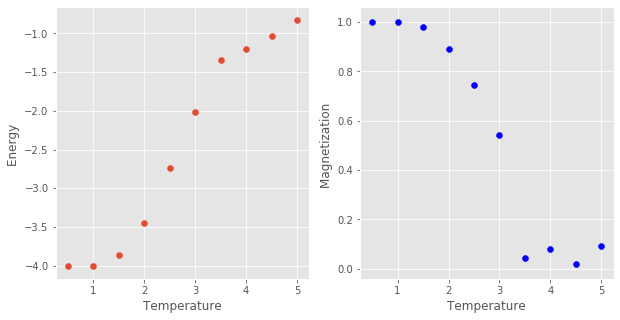

In [200]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Да, вполне.

Нам известно, что температура и магнитные свойства вещест связаны. Из графика мы можем увидеть, что, если будем повышать температуру, то ферромагнитый материал будет иметь все меньшую и меньшую намагниченность.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [201]:
N = 64
state = getInitialState(N)

In [208]:
plt.figure()
# Write your code here
makeFlip(0.5, state);

<Figure size 432x288 with 0 Axes>

In [127]:
stateLow = state.copy()
tLow = 0.5


for _ in range(30):
    
    stateLow = makeFlip(tLow, stateLow)

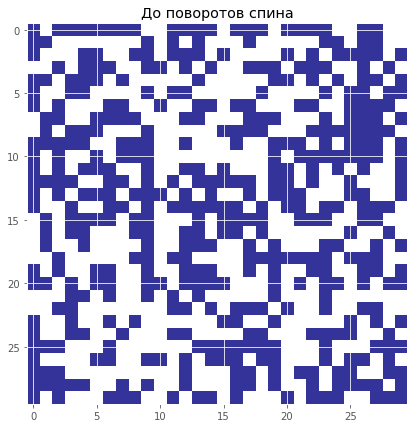

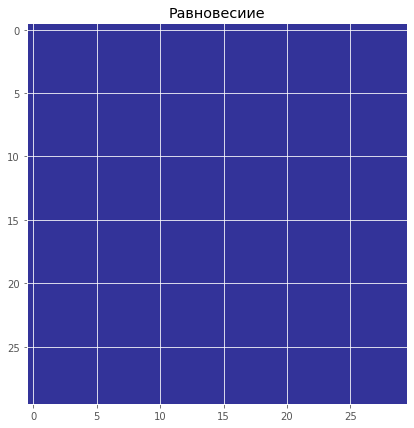

In [207]:
state = getInitialState(30)

plt.figure(figsize=(7, 7))
plt.imshow(state, cmap="terrain")
plt.title('До поворотов спина')


for i in range(500):         
    state = makeFlip(0.0005, state)
    
    
plt.figure(figsize=(7, 7))
plt.imshow(state, cmap= 'terrain' )
plt.title('Равновесиие')
plt.show()

<Figure size 432x288 with 0 Axes>

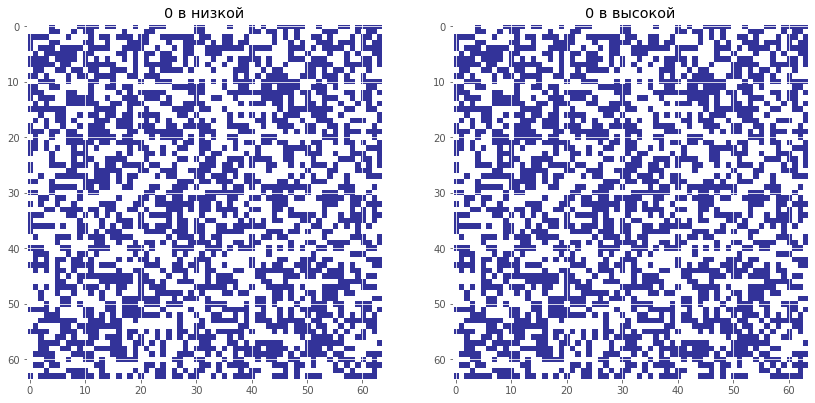

<Figure size 432x288 with 0 Axes>

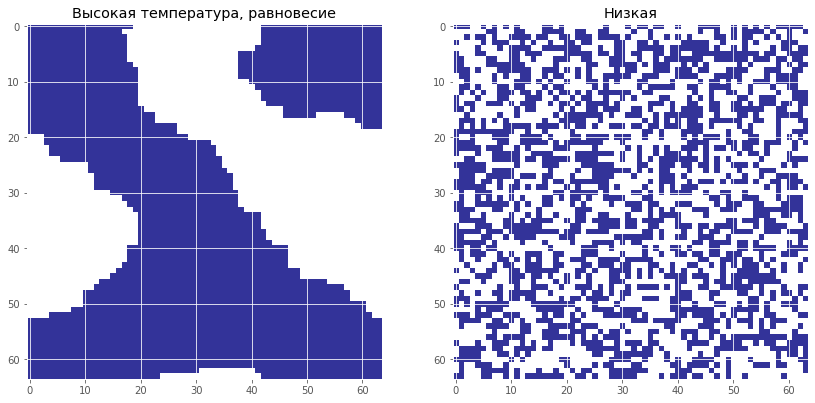

In [206]:
N = 64

state_low = getInitialState(N)
state_high = state_low.copy()

plt.figure()

_, ax = plt.subplots(1, 2, figsize=(14, 7));

ax[0].imshow(state_low, cmap= 'terrain')
ax[0].set_title("0 в низкой");


ax[1].imshow(state_high, cmap= 'terrain')
ax[1].set_title('0 в высокой');

for _ in range(100):
    makeFlip(0.01, state_low)
    makeFlip(10., state_high)

plt.figure()

_, ax = plt.subplots(1, 2, figsize=(14, 7));

ax[0].imshow(state_low, cmap= 'terrain')
ax[0].set_title('Высокая температура, равновесие');


ax[1].imshow(state_high, cmap= 'terrain')
ax[1].set_title('Низкая');
plt.show()

При низкой температуре в ферромагнетиках формируются домены, что и видно на первом графике (области одного цвета = области с одинаково направленным спином). На втором графике видно, что при увеличении температуры связь между спинами ослабляется, и в материале исчезают большие области с одинаковой намагниченностью